In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [19]:
transform_no_aug = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])


In [20]:
transform_aug = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomRotation(10),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])


In [21]:
train_no_aug = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform_no_aug
)

train_aug = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform_aug
)

train_loader_no_aug = DataLoader(train_no_aug, batch_size=64, shuffle=True)
train_loader_aug = DataLoader(train_aug, batch_size=64, shuffle=True)


In [22]:
def get_resnet18():
    model = models.resnet18(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, 10)
    return model.to(device)


In [23]:
def train_model(model, loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    acc_list = []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0

        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        acc = 100 * correct / total
        acc_list.append(acc)
        print(f"Epoch {epoch+1}: Accuracy = {acc:.2f}%")

    return acc_list


In [16]:
model_no_aug = get_resnet18()
acc_no_aug = train_model(model_no_aug, train_loader_no_aug)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 207MB/s]


Epoch 1: Accuracy = 98.00%
Epoch 2: Accuracy = 99.00%
Epoch 3: Accuracy = 99.21%
Epoch 4: Accuracy = 99.30%
Epoch 5: Accuracy = 99.40%


In [24]:
model_aug = get_resnet18()
acc_aug = train_model(model_aug, train_loader_aug)


Epoch 1: Accuracy = 97.83%
Epoch 2: Accuracy = 98.83%
Epoch 3: Accuracy = 99.01%
Epoch 4: Accuracy = 99.18%
Epoch 5: Accuracy = 99.27%


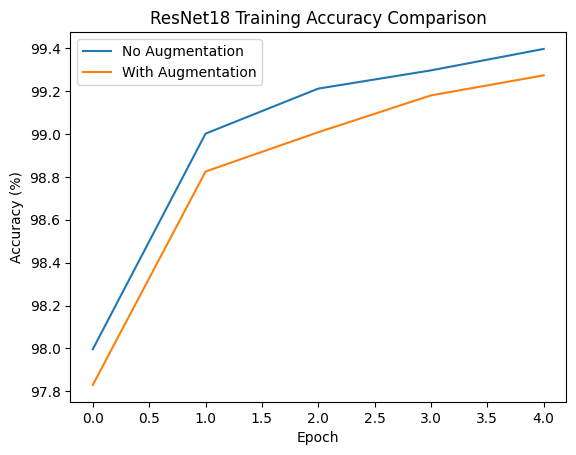

In [25]:
plt.plot(acc_no_aug, label="No Augmentation")
plt.plot(acc_aug, label="With Augmentation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("ResNet18 Training Accuracy Comparison")
plt.legend()
plt.show()
